In [1]:
import json

In [4]:
with open('./example-argumentation-framework.json', 'r') as f:
    data = json.load(f)

In [5]:
data

{'Arguments': {'0': 'We should go to the cinema.',
  '1': 'We should go to the gym.',
  '2': 'The gym is better for the health than the cinema.',
  '3': 'We have no time for evening activities, since there is an exam coming up.',
  '4': 'The exam is in a few weeks.',
  '5': 'We have no money for cinema or gym.',
  '6': 'We just got our sallaries.'},
 'Attack Relations': [['0', '1'],
  ['1', '0'],
  ['2', '0'],
  ['3', '0'],
  ['3', '1'],
  ['4', '3'],
  ['5', '0'],
  ['5', '1'],
  ['6', '5']]}

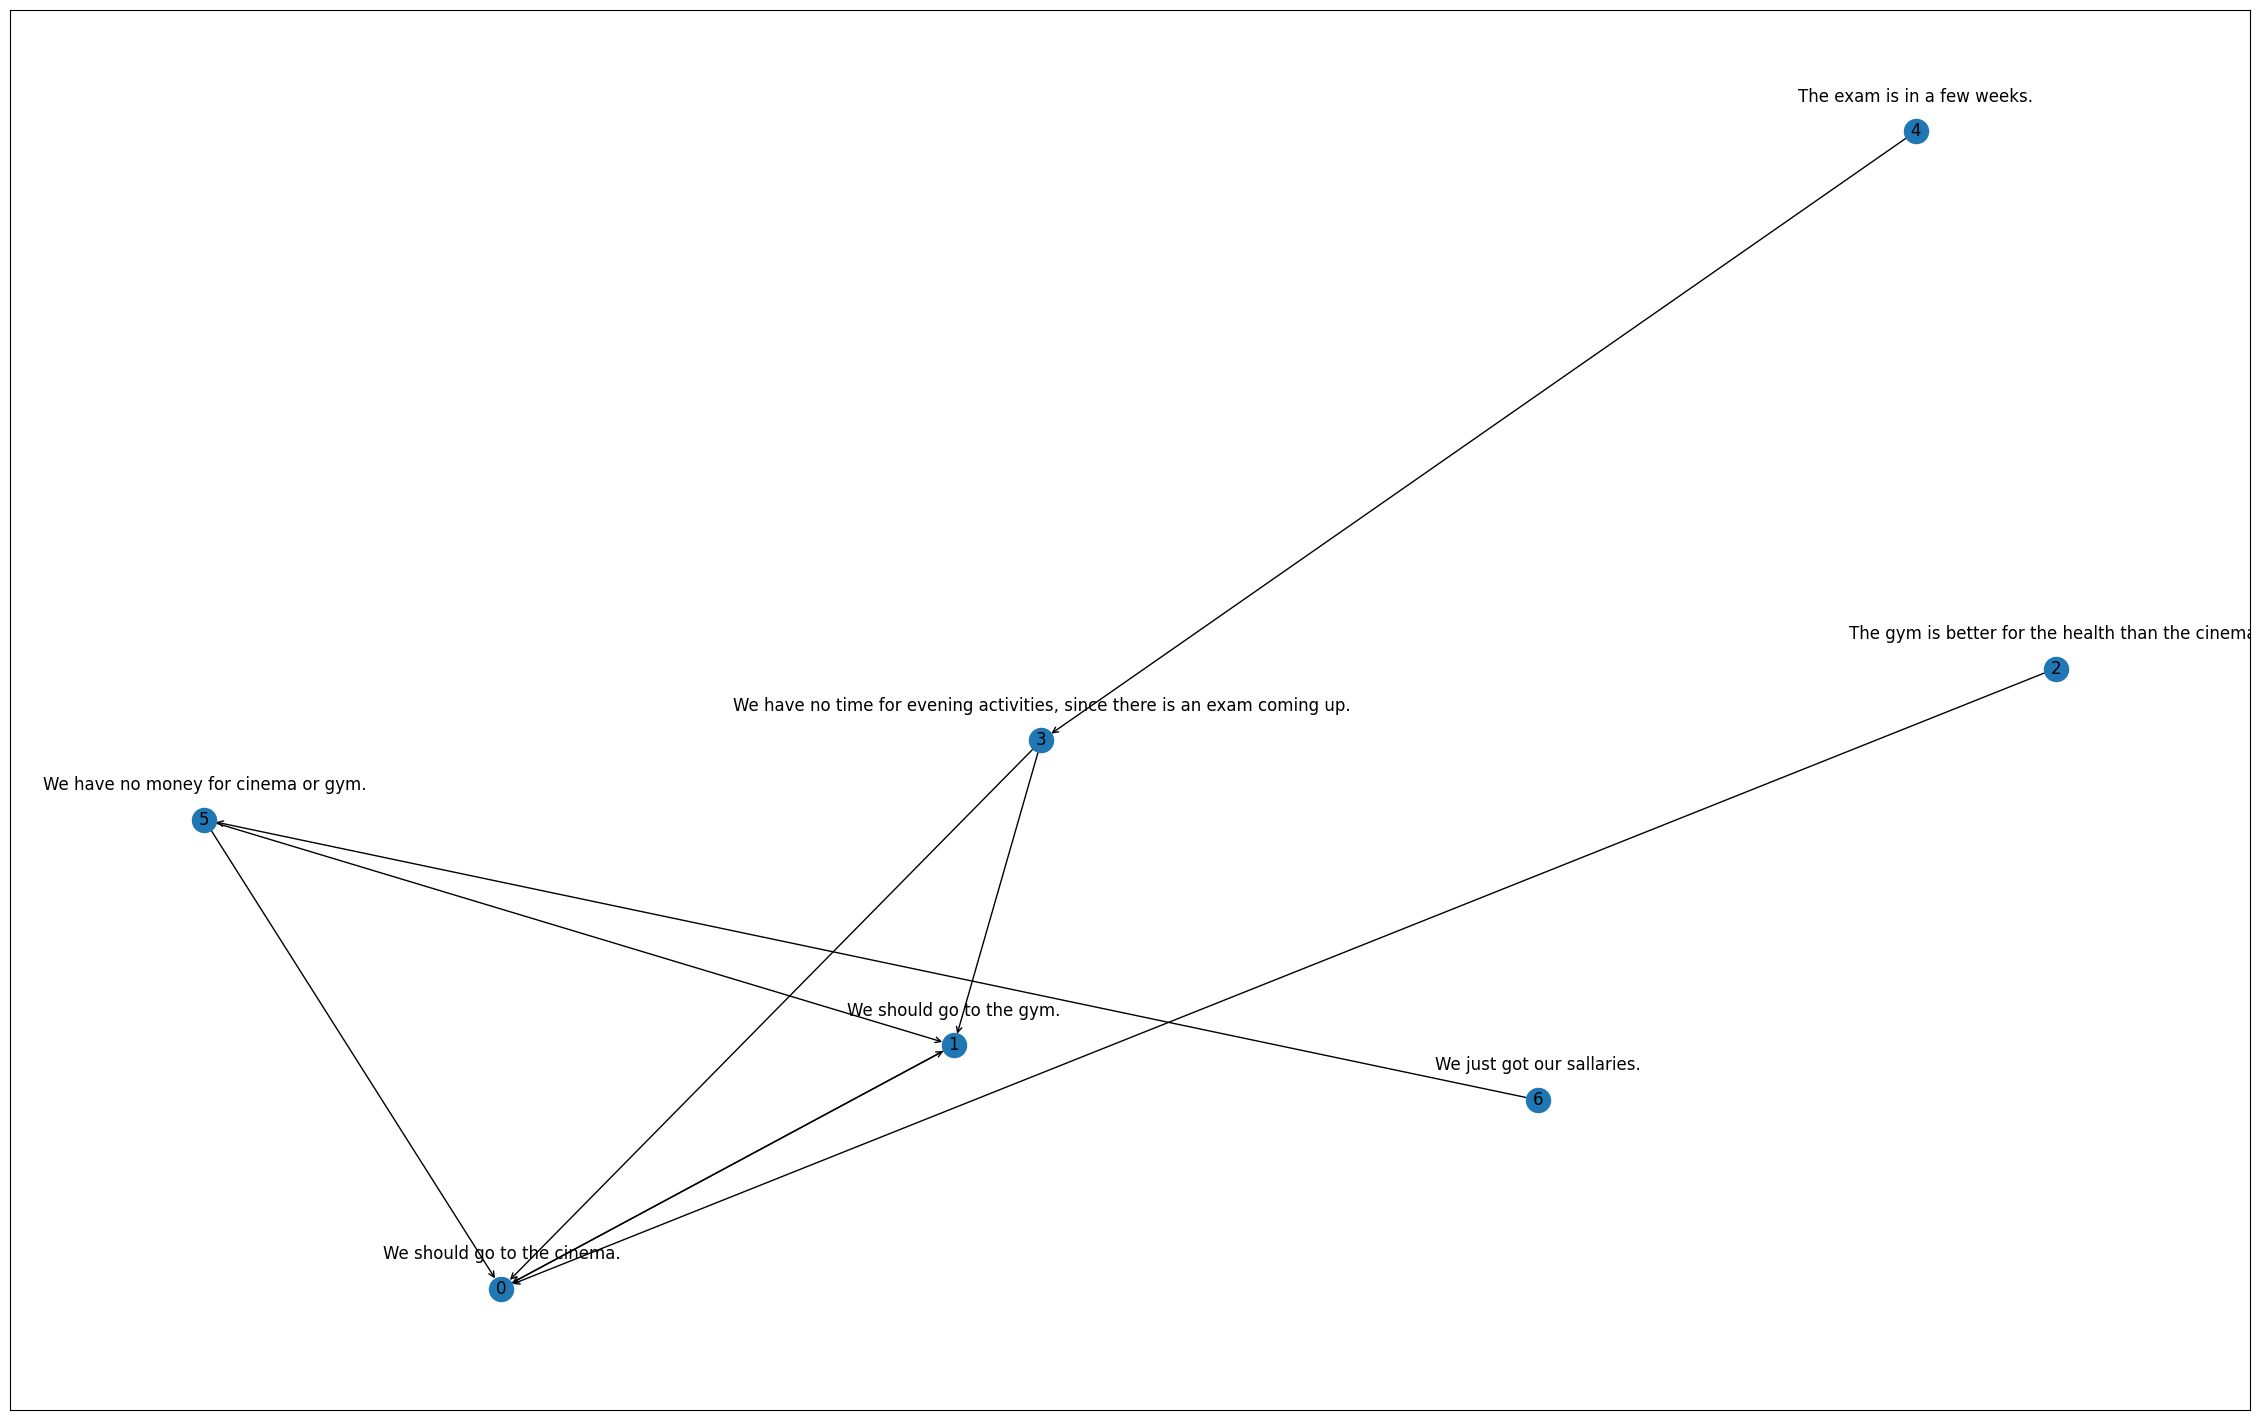

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(data['Arguments'].keys())

# Add edges to the graph
G.add_edges_from(data['Attack Relations'])

# Define position layout
pos = nx.spring_layout(G)

# Create a figure with a specific size (width, height)
plt.figure(figsize=(16, 10))

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw the edges
nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=10)

# Draw the node labels (which are the keys)
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the argument text next to the nodes
argument_text = {k: f'{v}' for k, v in data['Arguments'].items()}
pos_higher = {k: (v[0], v[1]+0.05) for k, v in pos.items()}  # positions for argument text
nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=12)

# Adjust the figure's margins
plt.subplots_adjust(left=0.1, right=1.5, top=1.5, bottom=0.1)

plt.show()
